# 0. Import Library

In [1]:
import pandas as pd
import numpy as np
import warnings
import re
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Automobile_data.csv')    # import csv file
data.head() 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
data.columns=[column.lower().replace(' ', '_',) for column in data.columns]
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# 1. Cleaning 

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
data.shape

(205, 26)

In [7]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
# 

In [9]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [10]:

data['price'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object>

### Cleaning rows from missing values for Price, Horse Power, and Bore

In [11]:
# There are 4 '?' values in the column Price
data['bore'].value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    12
3.46     9
3.31     8
3.43     8
3.78     8
3.27     7
2.91     7
3.58     6
3.39     6
3.05     6
3.54     6
3.7      5
3.01     5
3.35     4
?        4
3.17     3
3.74     3
3.59     3
3.8      2
3.5      2
3.63     2
3.13     2
3.94     2
3.47     2
3.33     2
3.24     2
2.92     1
2.68     1
3.76     1
3.08     1
2.54     1
3.61     1
3.6      1
2.99     1
3.34     1
Name: bore, dtype: int64

In [12]:
data_price = data[data['price']!='?']   # I deleted '?' values
data_price.shape

(201, 26)

In [13]:
data_hp = data[data['horsepower']!='?']   # I deleted '?' values
data_hp.shape

(203, 26)

In [14]:
data_cylinder = data[data['bore']!='?']   # I deleted '?' values
data_cylinder.shape

(201, 26)

### Replacing missing values with Mean

Calculate the mean

In [15]:
data_price_mean = (data_price['price'].astype(int)).mean()
data_price_mean

13207.129353233831

In [16]:
data_hp_mean = (data_hp['horsepower'].astype(int)).mean()
data_hp_mean

104.25615763546799

In [17]:
data_cylinder_mean = (data_cylinder['bore'].astype(float)).mean()
data_cylinder_mean

3.3297512437810943

Replacing '?' values with Mean

In [18]:
data['price']=data['price'].replace('?',data_price_mean).astype(int)

In [19]:
data['horsepower']=data['horsepower'].replace('?',data_hp_mean).astype(int)

In [20]:
data['bore']=data['bore'].replace('?',data_cylinder_mean).astype(float)

In [21]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,10.142537,104.253659,25.219512,30.751220,13207.126829
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,3.972040,39.519219,6.542142,6.886443,7868.768212
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,8.600000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,9.000000,95.000000,24.000000,30.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,23.000000,288.000000,49.000000,54.000000,45400.000000


## 1.1 Adapting inflation prices to compare with 2020 EV dataset 

My goal is to adapt the prices of this dataset from 1987 to prices in 2020. After doing a research I discovered a price increasing of 128%. 
I will apply the apply the price increase on column 'price'. 

In [22]:
data['price'] = 2.28 * data['price'] 
data['price']

0      30768.6
1      37620.0
2      37620.0
3      31806.0
4      39786.0
        ...   
200    38406.6
201    43422.6
202    48985.8
203    51231.6
204    51585.0
Name: price, Length: 205, dtype: float64

In [23]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,10.142537,104.253659,25.219512,30.751220,30112.249171
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,3.972040,39.519219,6.542142,6.886443,17940.791524
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,7.000000,48.000000,13.000000,16.000000,11669.040000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,8.600000,70.000000,19.000000,25.000000,17756.640000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,9.000000,95.000000,24.000000,30.000000,24156.600000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,9.400000,116.000000,30.000000,34.000000,37620.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,23.000000,288.000000,49.000000,54.000000,103512.000000


In [24]:
# export cleaned dataframe to csv that will be used in Tableau
data.to_csv('Tableau_Automobile.csv')

# 2. Exploratory Data Analysis

## Heatmap

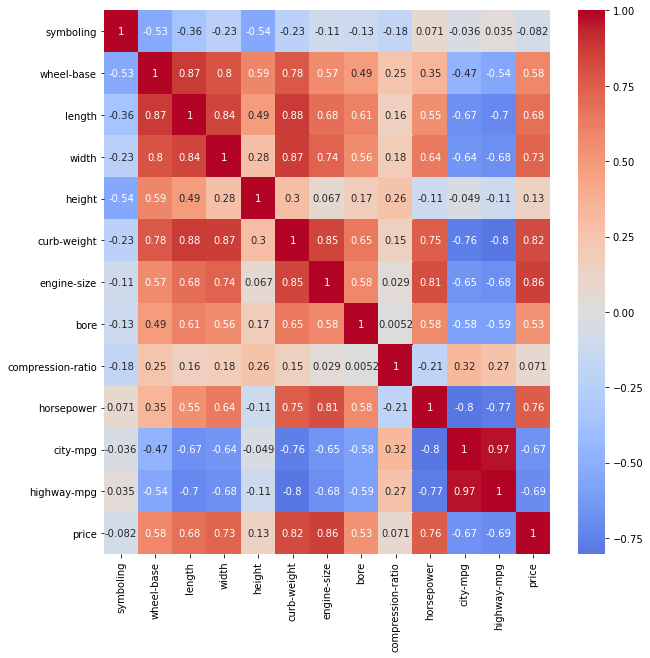

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))

mask=np.zeros_like(data.corr()) # define fields we don't want to see
mask[np.triu_indices_from(mask)]=True

sns.heatmap(data.corr(),  # the data for the heatmap, our dataframe
            annot=True,  # show the actual values of correlation in the map
            cmap='coolwarm',  # provide the 'coolwarm' colormap for the heatmap
            center=0,  # specify the value at which to center the colormap, we set it to zero, so negative correlations are displayed as negatives
           )
plt.show()

## Scatter plots

Scatter plot Price and Engine size

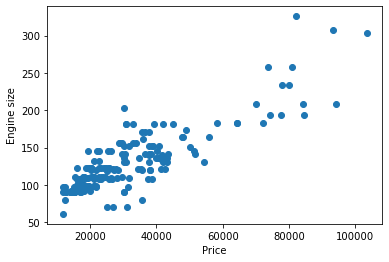

In [26]:
plt.scatter(x=data['price'],y=data['engine-size'])
plt.xlabel('Price')
plt.ylabel('Engine size')
plt.show()

Scatter plot Price and Curb Weight

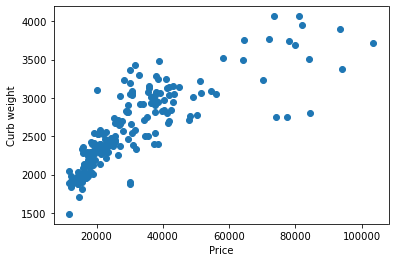

In [27]:
plt.scatter(x=data['price'],y=data['curb-weight'])
plt.xlabel('Price')
plt.ylabel('Curb weight')
plt.show()

Scatter plot Price and Horse Power

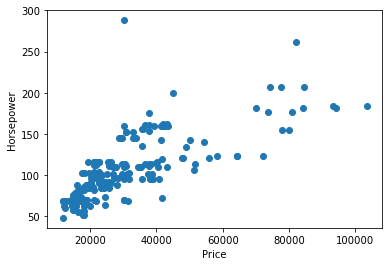

In [28]:
plt.scatter(x=data['price'],y=data['horsepower'])
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.show()

Scatter plot Price and Width

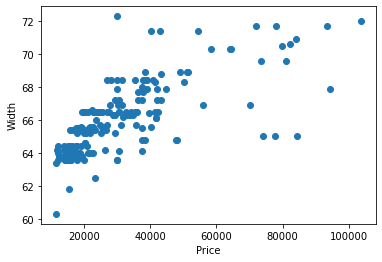

In [29]:
plt.scatter(x=data['price'],y=data['width'])
plt.xlabel('Price')
plt.ylabel('Width')
plt.show()

Scatter plot Price and Body style

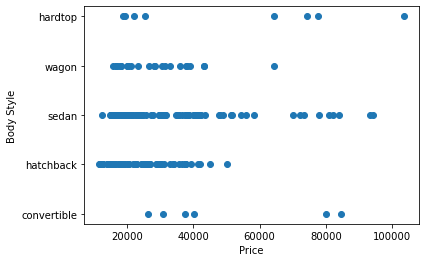

In [34]:
plt.scatter(x=data['price'],y=data['body-style'])
plt.xlabel('Price')
plt.ylabel('Body Style')
plt.show()

## Distribution charts

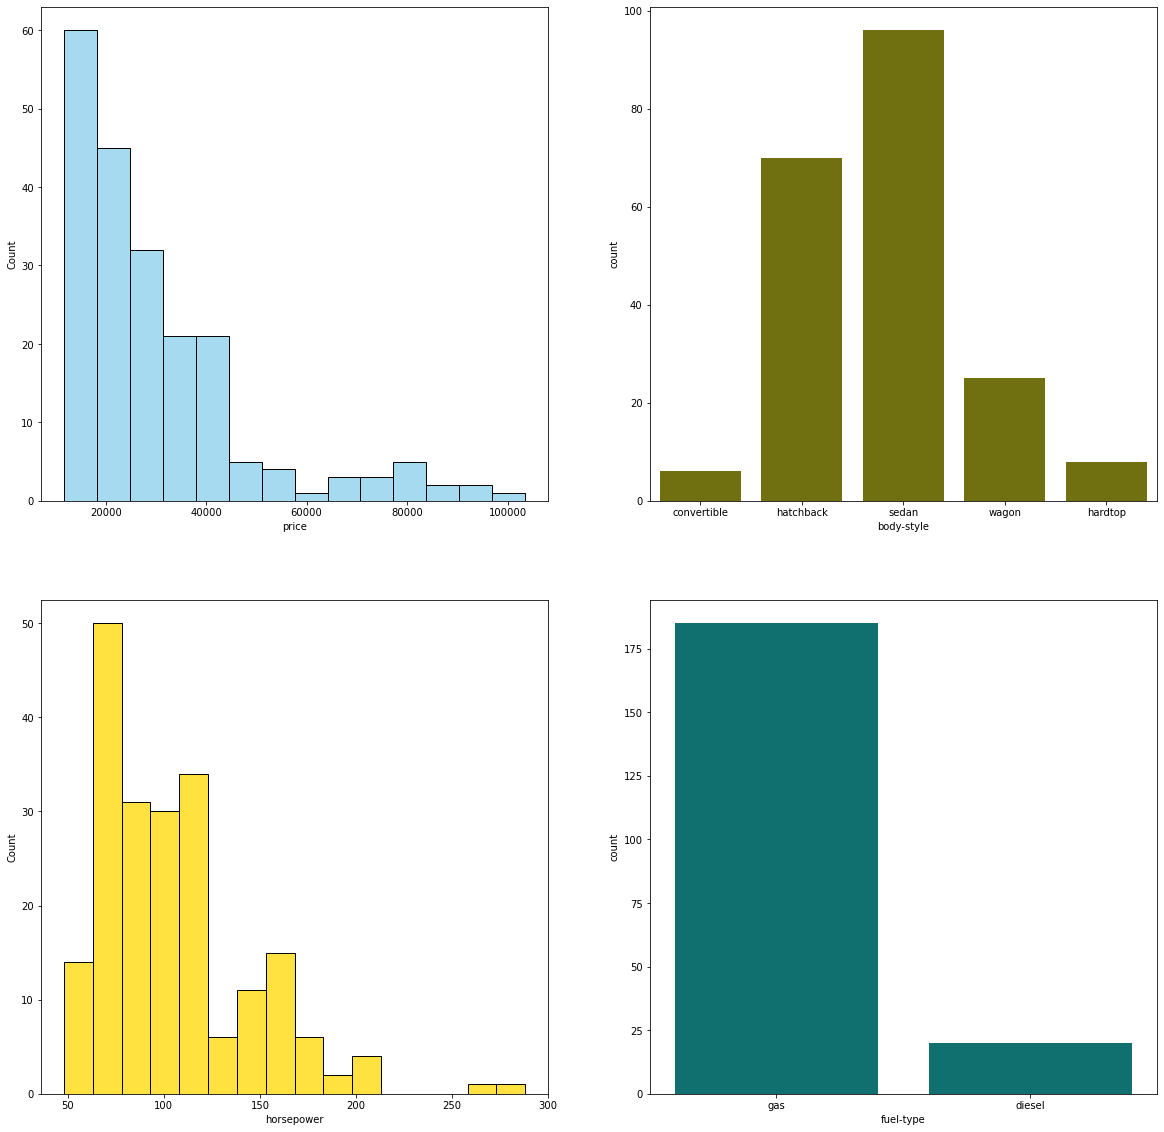

In [30]:
f, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=False);
sns.histplot(x=data["price"] , color="skyblue", ax=axes[0, 0]);
sns.countplot(x=data["body-style"] , color="olive", ax=axes[0, 1]);
sns.histplot(x=data["horsepower"], color="gold", ax=axes[1, 0]);
sns.countplot(x=data["fuel-type"] , color="teal", ax=axes[1, 1]);

# 3. Additional Wrangling/Cleaning

Considering only the columns which are relevant for the model

In [31]:
data = data.drop(['symboling', 'normalized-losses','aspiration',
       'num-of-doors', 'engine-location',
       'wheel-base', 'peak-rpm', 'city-mpg',
       'highway-mpg'], axis = 1)

In [32]:
data.head()

,make,fuel-type,body-style,drive-wheels,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,price
0,alfa-romero,gas,convertible,rwd,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,30768.6
1,alfa-romero,gas,convertible,rwd,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,37620.0
2,alfa-romero,gas,hatchback,rwd,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,37620.0
3,audi,gas,sedan,fwd,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,31806.0
4,audi,gas,sedan,4wd,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,39786.0


In [36]:
data.dtypes

make                  object
fuel-type             object
body-style            object
drive-wheels          object
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int64
price                float64
dtype: object

# Get numericals data

In [38]:
numericals = data.select_dtypes(np.number)
numericals.head()

,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,price
0,168.8,64.1,48.8,2548,130,3.47,9.0,111,30768.6
1,168.8,64.1,48.8,2548,130,3.47,9.0,111,37620.0
2,171.2,65.5,52.4,2823,152,2.68,9.0,154,37620.0
3,176.6,66.2,54.3,2337,109,3.19,10.0,102,31806.0
4,176.6,66.4,54.3,2824,136,3.19,8.0,115,39786.0


# 4. Modelling


I'll considered the following variables for car Price prediction: 

 Width,Curb Weight,Engine Size and Horsepower 

In [40]:
numericals = numericals.drop(['length', 'height', 'compression-ratio', 'bore'], axis = 1)
numericals.head()

,width,curb-weight,engine-size,horsepower,price
0,64.1,2548,130,111,30768.6
1,64.1,2548,130,111,37620.0
2,65.5,2823,152,154,37620.0
3,66.2,2337,109,102,31806.0
4,66.4,2824,136,115,39786.0


### Split data into dependent and independent variables 

In [42]:
X = numericals.drop(columns="price")
y = numericals.price

### Preprocesssing

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Test Train Split

In [64]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.1,random_state= 40)

print('Training Set:',len(X_train))
print('Test Set:',len(X_test))
print('Training labels:',len(y_train))
print('Test labels:',len(y_test))

Training Set: 184
Test Set: 21
Training labels: 184
Test labels: 21


### Get model, fit, make predictions and evaluate

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# Fitting the training data into the linear regression model

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [66]:
# A predicition array is presented
predictions  = lin_model.predict(X_test)
predictions

array([41977.13810329, 32444.20075739, 15324.2043852 , 15622.98497814,
       22325.8095983 , 26206.06575153, 27276.03228446, 16288.17570601,
       53422.86211565, 13919.97075605, 23505.52870051, 22795.83129263,
       15935.978654  , 14449.67774489, 33948.93552387, 23164.57750602,
       17698.17905074, 19191.63277769, 14916.65587895, 22606.81667403,
       14619.36469981])

In [67]:
#This is the r2 score
r2 = r2_score(y_test, predictions)
r2

0.8847731787554082

In [68]:
# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(mse)

15847820.04690444


The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

In [69]:
# Root Mean Square Error
import math 
rmse = math.sqrt(mse)
print(rmse)

3980.93205755944


Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit

### Comparing predicted prices vs actual prices

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

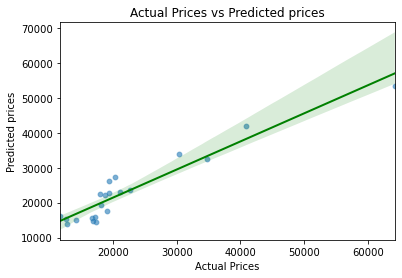

In [70]:
sns.scatterplot(y_test, predictions, alpha=0.4)
sns.regplot(y_test, predictions, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
